In [1]:

    refs =\
[ibis]: https://www.ibis-project.org/
[SQL]: https://en.wikipedia.org/wiki/SQL
[Python]: https://en.wikipedia.org/wiki/Python_(programming_language)
[flavor of sql]: https://stackoverflow.com/questions/1326318/difference-between-different-types-of-sql
[design]: https://docs.ibis-project.org/design.html
[sqlite]: https://www.sqlite.org/index.html
[pandas]: http://pandas.pydata.org/
[omnisci]: https://www.omnisci.com/
[glue]: https://docs.scipy.org/doc/numpy/user/c-info.python-as-glue.html
[dask]: https://dask.org/
[flavor of sql]: https://stackoverflow.com/questions/1326318/difference-between-different-types-of-sql
[dag]: https://en.wikipedia.org/wiki/Directed_acyclic_graph
[data]: http://www.seanlahman.com/baseball-archive/statistics/    
[database connection]: https://en.wikipedia.org/wiki/Database_connection
[tidy data]: https://vita.had.co.nz/papers/tidy-data.pdf
[openteams]: https://openteams.com/
[contributing]: https://docs.ibis-project.org/contributing.html
[qs]: https://www.quansight.com/
[graphviz]: https://graphviz.org
[materialized view]: https://en.wikipedia.org/wiki/Materialized_view

In [2]:
    import ibis
    
<!-- END_TEASER -->

    import ibis
    
<!-- END_TEASER -->

In [3]:
  
    if 'repo' not in locals():
        repo = __import__('requests').get('https://api.github.com/repos/ibis-project/ibis').json()
    image = lambda *x: HTML("""<div class="imageflex" style="display:flex;">%s</div>"""%''.join(F'''<img src="data:image/png;base64,{base64.b64encode(x._repr_png_()).decode()}"/>''' for x in x))
    raw = lambda *x: HTML("""<div style="display:flex;">%s</div>"""%''.join(F'''<img src="data:image/png;base64,{base64.b64encode(x).decode()}"/>''' for x in x))
    %matplotlib agg
    import graphviz, pytest, ibis
    
<style>
.imageflex:hover img {transform: scale(.8); max-height: 80%;}
.imageflex img {transform: scale(.3); max-height: 400px;}
</style>

In [4]:
![]({{repo['owner']['avatar_url']}})

![](https://avatars3.githubusercontent.com/u/27442526?v=4)

In [5]:
    import ibis, pandas, dask, pandas as 🐼, pytest, base64

    import ibis, pandas, dask, pandas as 🐼, pytest, base64

In [6]:
[`ibis`][ibis] is mature open source project that has been in development for __~{{((_panda_face_.to_datetime('now').tz_localize('utc')-_panda_face_.to_datetime(repo['created_at'])).days/365).__round__()}}__
years with __{{repo['stargazers_count']}}__ ⭐️gazers.
It provides an interface to SQL for [Python] programmers and 
bridges the gap between remote storage & execution systems.
These features provide authors the ability to:

1. Write backend independent [SQL] expressions in [Python].
2. Access different database connections (eg. [sqlite], [omnisci], [pandas]).
3. Visually confirm their SQL queries with [directed acyclic graphs (DAG)][dag].


[`ibis`][ibis] is an alternative approach using databases that relies [Python] rather than [SQL] experience.
Typically, folks would have to learn entirely new syntax,
or a [flavor of SQL], to perform simple tasks.
Now, those with Python abilities can avoid a steep learning curve
by using [`ibis`][ibis] for composing and executing expressions in [SQL]
using familiar syntaxes like [`pandas`][pandas] and [`dask`][dask]. 
[`ibis`][ibis] also assists in forming [SQL] expressions by providing visual feedback about each [Python] object.

This blog focuses on __writing [SQL] expressions in [Python]__ and how to compose queries using [`ibis`][ibis] visually.
We’ll demonstrate the features using [SQLite] and [Sean Lahman’s baseball database][data]. 

{{refs}}

[`ibis`][ibis] is mature open source project that has been in development for __~5__
years with __1345__ ⭐️gazers.
It provides an interface to SQL for [Python] programmers and 
bridges the gap between remote storage & execution systems.
These features provide authors the ability to:

1. Write backend independent [SQL] expressions in [Python].
2. Access different database connections (eg. [sqlite], [omnisci], [pandas]).
3. Visually confirm their SQL queries with [directed acyclic graphs (DAG)][dag].


[`ibis`][ibis] is an alternative approach using databases that relies [Python] rather than [SQL] experience.
Typically, folks would have to learn entirely new syntax,
or a [flavor of SQL], to perform simple tasks.
Now, those with Python abilities can avoid a steep learning curve
by using [`ibis`][ibis] for composing and executing expressions in [SQL]
using familiar syntaxes like [`pandas`][pandas] and [`dask`][dask]. 
[`ibis`][ibis] also assists in forming [SQL] expressions by providing visual feedback about each [Python] object.

This blog focuses on __writing [SQL] expressions in [Python]__ and how to compose queries using [`ibis`][ibis] visually.
We’ll demonstrate the features using [SQLite] and [Sean Lahman’s baseball database][data]. 

[ibis]: https://www.ibis-project.org/
[SQL]: https://en.wikipedia.org/wiki/SQL
[Python]: https://en.wikipedia.org/wiki/Python_(programming_language)
[flavor of sql]: https://stackoverflow.com/questions/1326318/difference-between-different-types-of-sql
[design]: https://docs.ibis-project.org/design.html
[sqlite]: https://www.sqlite.org/index.html
[pandas]: http://pandas.pydata.org/
[omnisci]: https://www.omnisci.com/
[glue]: https://docs.scipy.org/doc/numpy/user/c-info.python-as-glue.html
[dask]: https://dask.org/
[flavor of sql]: https://stackoverflow.com/questions/1326318/difference-between-different-types-of-sql
[dag]: https://en.wikipedia.org/wiki/Directed_acyclic_graph
[data]: http://www.seanlahman.com/baseball-archive/statistics/    
[database connection]: https://en.wikipedia.org/wiki/Database_connection
[tidy data]: https://vita.had.co.nz/papers/tidy-data.pdf
[openteams]: https://openteams.com/
[contributing]: https://docs.ibis-project.org/contributing.html
[qs]: https://www.quansight.com/
[graphviz]: https://graphviz.org
[materialized view]: https://en.wikipedia.org/wiki/Materialized_view

In [7]:
## Connecting to a database.

Getting started, we’ll need to establish a [database connection]. [`ibis`][ibis] makes it easy to create different connections.

    client = ibis.sqlite.connect('lahmansbaseballdb.sqlite')
    
<br/>
    
The `client` variable represents our connection to the database.
The [baseball database][data] has __{{client.list_tables().__len__()}}__ tables, 
which we can see by running the following code snippet:

    >>> client.list_tables()
    [...'appearances'...'halloffame', 'homegames', 'leagues', 'managers',...]

---

>> It will be essential to use the correct [`ibis`][ibis] `client` for the file types.

---

{{refs}}

## Connecting to a database.

Getting started, we’ll need to establish a [database connection]. [`ibis`][ibis] makes it easy to create different connections.

    client = ibis.sqlite.connect('lahmansbaseballdb.sqlite')
    
<br/>
    
The `client` variable represents our connection to the database.
The [baseball database][data] has __29__ tables, 
which we can see by running the following code snippet:

    >>> client.list_tables()
    [...'appearances'...'halloffame', 'homegames', 'leagues', 'managers',...]

---

>> It will be essential to use the correct [`ibis`][ibis] `client` for the file types.

---

[ibis]: https://www.ibis-project.org/
[SQL]: https://en.wikipedia.org/wiki/SQL
[Python]: https://en.wikipedia.org/wiki/Python_(programming_language)
[flavor of sql]: https://stackoverflow.com/questions/1326318/difference-between-different-types-of-sql
[design]: https://docs.ibis-project.org/design.html
[sqlite]: https://www.sqlite.org/index.html
[pandas]: http://pandas.pydata.org/
[omnisci]: https://www.omnisci.com/
[glue]: https://docs.scipy.org/doc/numpy/user/c-info.python-as-glue.html
[dask]: https://dask.org/
[flavor of sql]: https://stackoverflow.com/questions/1326318/difference-between-different-types-of-sql
[dag]: https://en.wikipedia.org/wiki/Directed_acyclic_graph
[data]: http://www.seanlahman.com/baseball-archive/statistics/    
[database connection]: https://en.wikipedia.org/wiki/Database_connection
[tidy data]: https://vita.had.co.nz/papers/tidy-data.pdf
[openteams]: https://openteams.com/
[contributing]: https://docs.ibis-project.org/contributing.html
[qs]: https://www.quansight.com/
[graphviz]: https://graphviz.org
[materialized view]: https://en.wikipedia.org/wiki/Materialized_view


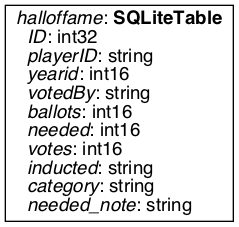
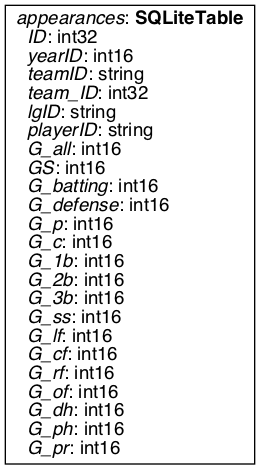

,ID,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note
0,1,cobbty01,1936,BBWAA,226,170,222,Y,Player,None
1,2,ruthba01,1936,BBWAA,226,170,215,Y,Player,None
2,3,wagneho01,1936,BBWAA,226,170,215,Y,Player,None
3,4,mathech01,1936,BBWAA,226,170,205,Y,Player,None
4,5,johnswa01,1936,BBWAA,226,170,189,Y,Player,None


## Selecting and visualizing tables.

We can now create a data frame from [ibis] expressions similar to the example above.
To demonstrate some of [`ibis`][ibis]’s capabilities,
we’ll discuss information in the `halloffame` and `appearances` tables.
Let's create the tables now.

    halloffame, appearances = client.table('halloffame'), client.table('appearances')

<br/>
A useful feature of Ibis is its [DAG] representation of our [SQL] query using [`graphviz`][graphviz].
[`dask`][dask] users will be familiar with this feature.

<!--

    return image(halloffame, appearances)
    
-->


At the moment, the table doesn’t hold any data;
instead, it’s an expression used to manipulate data in the SQLite database.
We can assert this as follows:
    
    >>> assert isinstance(halloffame, ibis.expr.types.TableExpr)

    sample = halloffame.head()
    
Looking at a `sample` expression we can reveal the SQL query we constructed.
    
    >>> str(sample.compile())
    'SELECT t0."ID", t0."playerID",...FROM base.halloffame AS t0...LIMIT ? OFFSET ?'
    
And we can execute the expression to return a [tidy `pandas.DataFrame`][tidy data].
    
    >>> assert isinstance(sample.execute(), pandas.DataFrame)

    sample.execute()
    

In [8]:
## Selecting and visualizing tables.

We can now create a data frame from [ibis] expressions similar to the example above.
To demonstrate some of [`ibis`][ibis]’s capabilities,
we’ll discuss information in the `halloffame` and `appearances` tables.
Let's create the tables now.

    halloffame, appearances = client.table('halloffame'), client.table('appearances')

<br/>
A useful feature of Ibis is its [DAG] representation of our [SQL] query using [`graphviz`][graphviz].
[`dask`][dask] users will be familiar with this feature.

<!--

    return image(halloffame, appearances)
    
-->


At the moment, the table doesn’t hold any data;
instead, it’s an expression used to manipulate data in the SQLite database.
We can assert this as follows:
    
    >>> assert isinstance(halloffame, ibis.expr.types.TableExpr)

    sample = halloffame.head()
    
Looking at a `sample` expression we can reveal the SQL query we constructed.
    
    >>> str(sample.compile())
    'SELECT t0."ID", t0."playerID",...FROM base.halloffame AS t0...LIMIT ? OFFSET ?'
    
And we can execute the expression to return a [tidy `pandas.DataFrame`][tidy data].
    
    >>> assert isinstance(sample.execute(), pandas.DataFrame)

    sample.execute()
    


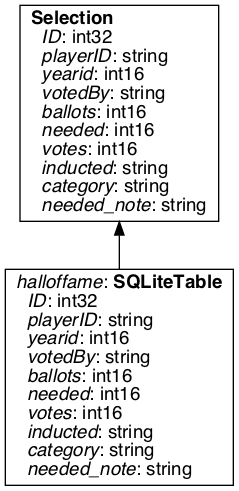

## Filtering and selecting data.

[ibis] uses familiar [pandas] syntax to build [SQL] queries.
Our first selection will `filter` the `players` from our data by applying the 
predicate to the `halloffame` expression.
    
    predicate = halloffame.category == 'Player'
    players = halloffame[predicate]
    
<!--

    return image(players)

-->

[ibis]: https://www.ibis-project.org/
[SQL]: https://en.wikipedia.org/wiki/SQL
[Python]: https://en.wikipedia.org/wiki/Python_(programming_language)
[flavor of sql]: https://stackoverflow.com/questions/1326318/difference-between-different-types-of-sql
[design]: https://docs.ibis-project.org/design.html
[sqlite]: https://www.sqlite.org/index.html
[pandas]: http://pandas.pydata.org/
[omnisci]: https://www.omnisci.com/
[glue]: https://docs.scipy.org/doc/numpy/user/c-info.python-as-glue.html
[dask]: https://dask.org/
[flavor of sql]: https://stackoverflow.com/questions/1326318/difference-between-different-types-of-sql
[dag]: https://en.wikipedia.org/wiki/Directed_acyclic_graph
[data]: http://www.seanlahman.com/baseball-archive/statistics/    
[database connection]: https://en.wikipedia.org/wiki/Database_connection
[tidy data]: https://vita.had.co.nz/papers/tidy-data.pdf
[openteams]: https://openteams.com/
[contributing]: https://docs.ibis-project.org/contributing.html
[qs]: https://www.quansight.com/
[graphviz]: https://graphviz.org
[materialized view]: https://en.wikipedia.org/wiki/Materialized_view

In [9]:
## Filtering and selecting data.

[ibis] uses familiar [pandas] syntax to build [SQL] queries.
Our first selection will `filter` the `players` from our data by applying the 
predicate to the `halloffame` expression.
    
    predicate = halloffame.category == 'Player'
    players = halloffame[predicate]
    
<!--

    return image(players)

-->

{{refs}}

In [ ]:
## Joining [`ibis`][ibis] tables.

A single view of the `halloffame` players and `appearances` requires us to join the two tables. 
To do this, we’ll perform an inner join based on the __playerID__ column.

    predicate = players.playerID == appearances.playerID
    
These tables share columns, but SQL doesn't handle overlapping columns very well.
To resolve this potential conflict, we will iterate over the 
columns in the appearances table and select on the columns not in the players table.
Then we will compose the join.
    
    columns = [x for x in appearances.columns if x not in {'playerID', 'ID'}]
    
Composing the join.
    
    unmaterialized = players.join(appearances[columns], predicate)
    
---

Joins, in databases, require a [materialized view] to proceed with building expressions.
With `ibis` this is just details because we can use the __materialize__ METHOD.

---

    join = unmaterialized.materialize()
    
    with pytest.raises(ibis.IbisError): unmaterialized.distinct()
    
    join = join.materialize().distinct()  # like 🐼.DataFrame.drop_duplicates

Below is a sample of our joined data. 

{{join.head().execute().to_html()}}


<!--

    return image(unmaterialized, join)

-->

{{refs}}

In [ ]:
<hr/>

[`ibis`][ibis] supports other join strategies.

    >>> [x for x in dir(players) if 'join' in x]
    ['anti_join', 'any_inner_join', 'any_left_join', 'asof_join', 'cross_join', 'inner_join', 'join', 'left_join', 'outer_join', 'semi_join']

<hr/>

In [ ]:
{{df.unstack(0)['count'].T.fillna('-').to_html()}}

## How many pitchers have been inducted into the hall of fame?

Some hitters may have also pitched, so we’ll need to filter out those appearances.

    pitchers = join[join.G_p > 100]

Group the `pitchers` based on a predicate.
    
    predicate = [pitchers.inducted, pitchers.yearID]
    
And count them annually.
    
    grouped_pitchers = pitchers.groupby(predicate).count()
    
    df = grouped_pitchers.execute().set_index('inducted yearID'.split())
    
    
<!--
    
    fig = df.loc['Y']['count'].pipe(
        lambda df: df.reindex(range(df.index.min(), df.index.max())).fillna(0)
    ).rename('Inducted pitchers').plot.bar(figsize=(15, 5), grid=True)

    
    fig = __import__('io').BytesIO()
    __import__('matplotlib').pyplot.savefig(fig)
    return raw(fig.getvalue())
    
-->

{{refs}}

In [ ]:
## What next?

In future posts, we’ll explore more backends and visualizing ibis objects.
If you’d like to contribute to ibis, please take a look at [OpenTeams] or the [ibis contributing guide][contributing].

{{refs}}